In [21]:
import scanpy.api as sc
import pandas as pd
import loompy
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [2]:
data1_path = './pairwise/t4k.csv'
data2_path = './pairwise/pbmc4k.csv'

In [3]:
data1 = pd.read_csv(data1_path, sep=",")

In [4]:
data2 = pd.read_csv(data2_path, sep=",")

In [5]:
import scanpy.api as sc
import mnnpy

In [6]:
def pandas_into_adata(dataset):
    var_seq = pd.DataFrame(index=dataset.index)
    obs_seq = pd.DataFrame(index=dataset.columns)
    X_seq = dataset.values.T
    adata_seq = ad.AnnData(X_seq, obs=obs_seq, var=var_seq)
    return adata_seq


In [7]:
adata1 = pandas_into_adata(data1)
adata2 = pandas_into_adata(data2)

In [8]:
adata1.shape

(4538, 2199)

In [9]:
%%time
corrected = mnnpy.mnn_correct(adata1, adata2,  batch_categories = ["N0123X", "N0124X"])
adata = corrected[0]

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 1: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.
CPU times: user 15min 28s, sys: 3min 4s, total: 18min 33s
Wall time: 6min 48s


In [11]:
adata

AnnData object with n_obs × n_vars = 8878 × 2199 
    obs: 'batch'

         Falling back to preprocessing with `sc.pp.pca` and default params.


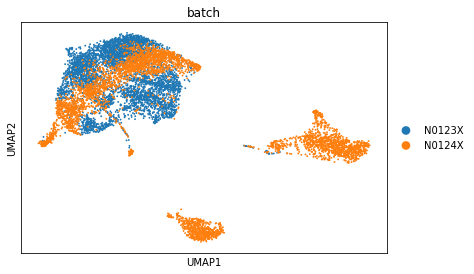

In [12]:
sc.pp.scale(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='batch')

In [14]:
adata

AnnData object with n_obs × n_vars = 8878 × 2199 
    obs: 'batch'
    uns: 'neighbors', 'batch_colors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [15]:
sc.pp.pca(adata)

In [16]:
adata

AnnData object with n_obs × n_vars = 8878 × 2199 
    obs: 'batch'
    uns: 'neighbors', 'batch_colors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [17]:
adata.obsm.X_pca.shape


(8878, 50)

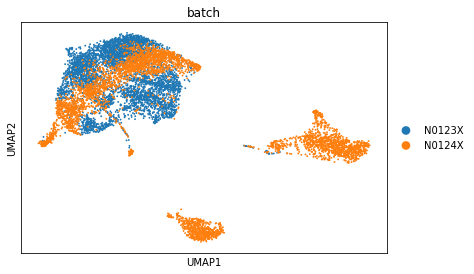

CPU times: user 202 ms, sys: 8.32 ms, total: 210 ms
Wall time: 208 ms


In [19]:
%%time
sc.pl.umap(adata, use_raw=False, color='batch')

In [22]:
%%time
sc.tl.tsne(adata)

CPU times: user 7min 45s, sys: 31.6 s, total: 8min 17s
Wall time: 5min 21s


In [23]:
adata

AnnData object with n_obs × n_vars = 8878 × 2199 
    obs: 'batch'
    uns: 'neighbors', 'batch_colors', 'pca'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

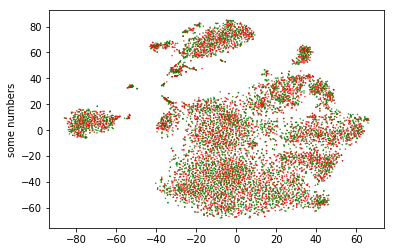

In [24]:
plt.scatter(adata.obsm.X_tsne[:,0], adata.obsm.X_tsne[:,1], s=0.2, color=['red','green'] )
plt.ylabel('some numbers')
plt.show()

In [25]:
adata.obsm.X_pca.shape

(8878, 50)

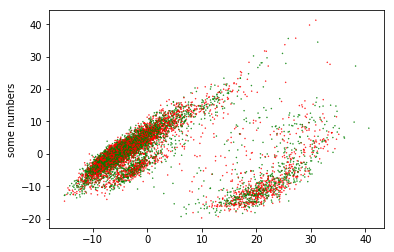

In [26]:
plt.scatter(adata.obsm.X_pca[:,0], adata.obsm.X_pca[:,1], s=0.2, color=['red','green'] )
plt.ylabel('some numbers')
plt.show()